<h3 style="text-align:center; font-weight:bold;">Run analyses and create visualizations</h3>

<p style="text-align:right; font-style:italic;">Last Edited: December 17th, 2025</p>

This notebook contains code for statistical analyses and visualizations using the final dataset (`data/finalD.csv`).
It produces `figures/figure1.png` and `figures/figure2.png` and includes additional moderator and mediation analyses involving `relatability_score`.

- Exploratory emotion profiles by parenting stage (exports `figures/figure1.png`)
- Finding 1: Analyses for main effect of emotion → engagement (exports `figures/figure2.png`)
- Finding 2: Analyses for relatability as a moderator for emotion → engagement
- Finding 3: Analyses for relatability as a mediator for emotion → engagement

`Section 1: Exploratory`

In [1]:
### Import relevant libraries

import csv
import pandas as pd
from math import pi
import matplotlib.pyplot as plt
import numpy as np

In [2]:
### Import dataset and state labels

age_labels = {"age1": "Pregnancy", "age2": "Newborn", "age3": "Toddler", "age4": "Elementary", "age5": "Teen"}
emotions = ["admiration","amusement","anger","annoyance","approval","caring","confusion", "curiosity","desire","disappointment",
    "disapproval","disgust","embarrassment", "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
    "pride","realization","relief","remorse","sadness","surprise"] #excludes neutral

finalD = pd.read_csv("data/finalD.csv")
finalD.head()

,username,engagement,age_group,relatability_score,admiration,amusement,anger,annoyance,approval,caring,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,anon_0001,0.167683,age1,0.955621,0.006489,0.002753,0.001264,0.003769,0.012369,0.000699,...,0.002649,0.000209,0.005396,0.000315,0.009154,0.000232,0.000669,0.002343,0.004203,0.681188
1,anon_0002,0.035644,age1,0.981253,0.006649,0.001622,0.000610,0.001963,0.014375,0.000633,...,0.001729,0.000284,0.001688,0.000724,0.008073,0.000480,0.000604,0.002883,0.003812,0.961542
2,anon_0003,0.024749,age1,0.878635,0.001476,0.000802,0.001870,0.004185,0.004589,0.001859,...,0.001891,0.000313,0.001142,0.000189,0.009771,0.000358,0.001830,0.015346,0.006977,0.481108
3,anon_0004,0.074244,age1,0.967317,0.046669,0.000551,0.000666,0.008453,0.015583,0.003500,...,0.003766,0.000393,0.002119,0.003368,0.022148,0.008300,0.001892,0.008402,0.000545,0.120321
4,anon_0005,0.061421,age1,0.526099,0.008951,0.009532,0.003827,0.022288,0.007278,0.009099,...,0.097502,0.000734,0.002674,0.000243,0.014961,0.001394,0.030267,0.120188,0.002904,0.315595


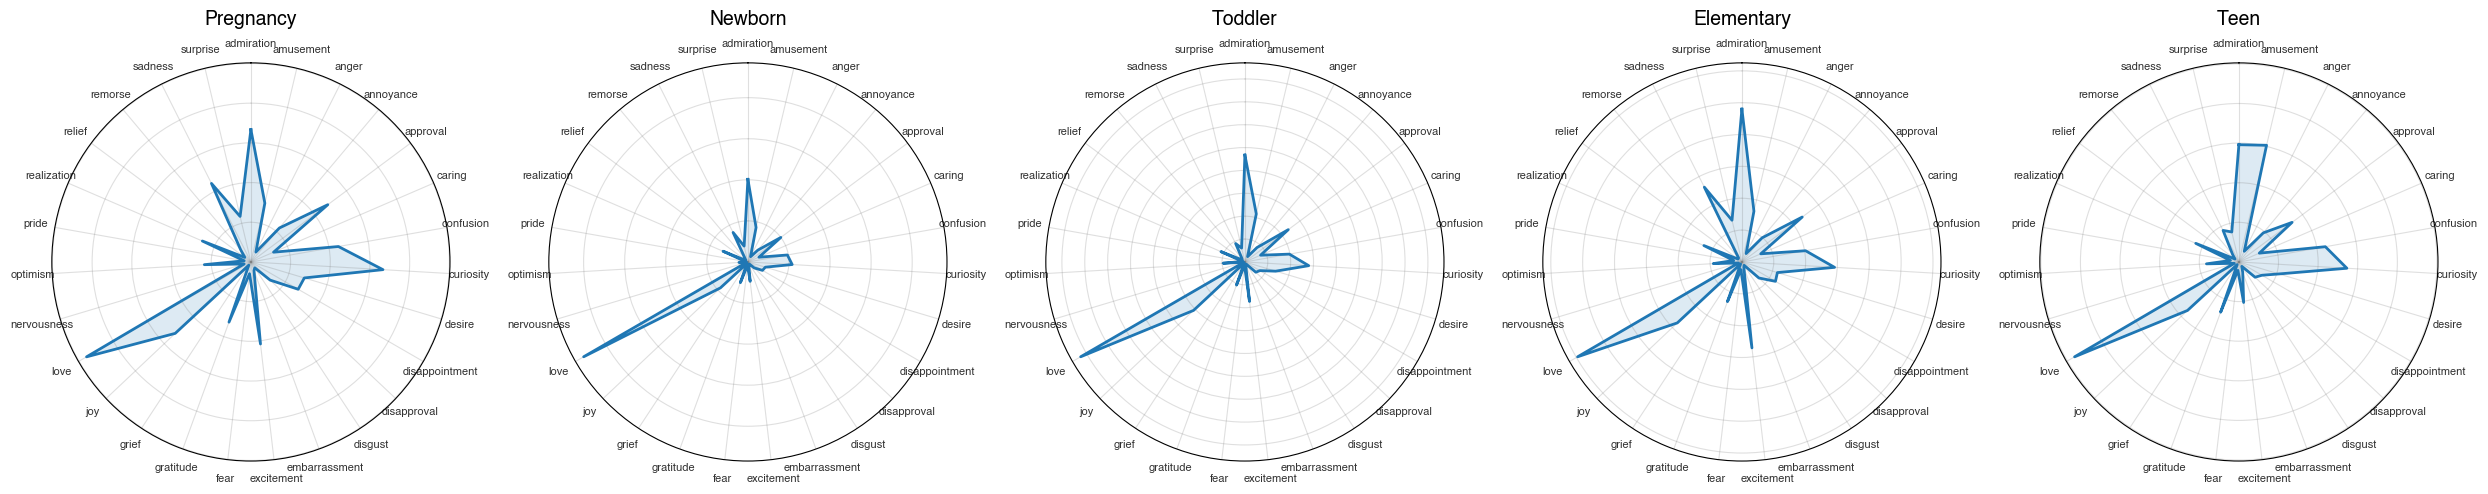

In [15]:
### Figure 1: Exploratory figure for emotion classifier

N = len(emotions)
angles = np.linspace(0, 2 * np.pi, N, endpoint=False).tolist()
angles += angles[:1]

plt.figure(figsize=(5 * len(age_labels), 5))

for i, grp in enumerate(age_labels, start=1):
    vals = finalD.groupby("age_group")[emotions].mean().loc[grp].tolist()
    vals += vals[:1]

    ax = plt.subplot(1, len(age_labels), i, polar=True)
    ax.set_theta_offset(pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(emotions, fontsize=8, color="#333")
    ax.grid(color="gray", alpha=0.25)
    ax.set_yticklabels([])

    ax.plot(angles, vals, linewidth=2)
    ax.fill(angles, vals, alpha=0.15)
    ax.set_title(age_labels.get(grp, grp), fontsize=14, pad=10, fontweight="bold")

plt.tight_layout()
plt.savefig("figures/figure1.png", dpi=300)
plt.show()


In [12]:
### Determine primary classified emotions

finalD['primary_emotion'] = finalD[emotions].idxmax(axis=1)
classE = finalD.groupby('age_group')['primary_emotion'].agg(num_unique_primary_emotions='nunique').reset_index()
classE['missing_emotions'] = classE['age_group'].apply(lambda g: [e for e in emotions if e not in finalD.loc[finalD['age_group']==g, 'primary_emotion'].unique()])

classE

,age_group,num_unique_primary_emotions,missing_emotions
0,age1,25,"[grief, relief]"
1,age2,21,"[disgust, embarrassment, grief, nervousness, pride, relief]"
2,age3,21,"[disgust, embarrassment, grief, nervousness, pride, relief]"
3,age4,23,"[disgust, grief, nervousness, relief]"
4,age5,26,[grief]


`Section 2: Main effects of emotion on engagement`

In [2]:
### Import relevant libraries

import csv
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
### Import dataset and state labels

age_labels = {"age1": "Pregnancy", "age2": "Newborn", "age3": "Toddler", "age4": "Elementary", "age5": "Teen"}
emotions = ["admiration","amusement","anger","annoyance","approval","caring","confusion", "curiosity","desire","disappointment",
    "disapproval","disgust","embarrassment", "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
    "pride","realization","relief","remorse","sadness","surprise"] #excludes neutral

finalD = pd.read_csv("data/finalD.csv")
finalD.head()

,username,engagement,age_group,relatability_score,admiration,amusement,anger,annoyance,approval,caring,...,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
0,anon_0001,0.167683,age1,0.955621,0.006489,0.002753,0.001264,0.003769,0.012369,0.000699,...,0.002649,0.000209,0.005396,0.000315,0.009154,0.000232,0.000669,0.002343,0.004203,0.681188
1,anon_0002,0.035644,age1,0.981253,0.006649,0.001622,0.000610,0.001963,0.014375,0.000633,...,0.001729,0.000284,0.001688,0.000724,0.008073,0.000480,0.000604,0.002883,0.003812,0.961542
2,anon_0003,0.024749,age1,0.878635,0.001476,0.000802,0.001870,0.004185,0.004589,0.001859,...,0.001891,0.000313,0.001142,0.000189,0.009771,0.000358,0.001830,0.015346,0.006977,0.481108
3,anon_0004,0.074244,age1,0.967317,0.046669,0.000551,0.000666,0.008453,0.015583,0.003500,...,0.003766,0.000393,0.002119,0.003368,0.022148,0.008300,0.001892,0.008402,0.000545,0.120321
4,anon_0005,0.061421,age1,0.526099,0.008951,0.009532,0.003827,0.022288,0.007278,0.009099,...,0.097502,0.000734,0.002674,0.000243,0.014961,0.001394,0.030267,0.120188,0.002904,0.315595


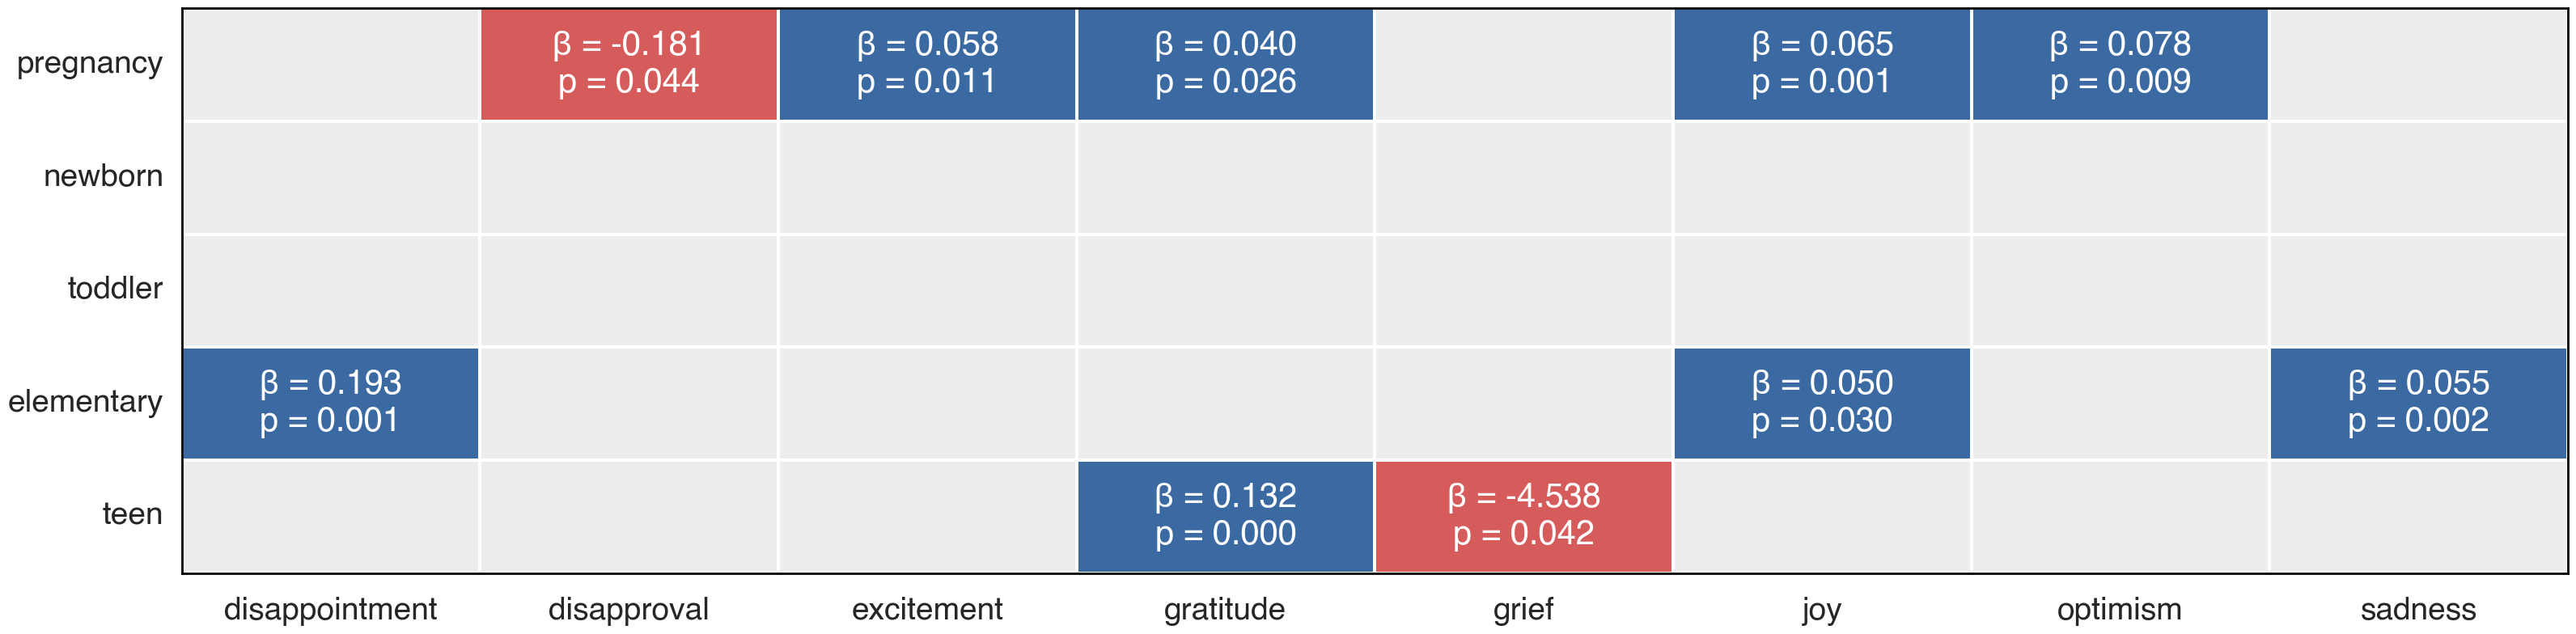

In [40]:
### Figure 2

emo_sign = pd.DataFrame(np.nan, index=age_labels, columns=emotions)
coef_text = pd.DataFrame("", index=age_labels, columns=emotions)

# fit regression per emotion x age group
for g in age_labels:
    d = finalD[finalD['age_group']==g]
    for e in emotions:
        X = sm.add_constant(d[[e]])
        y = d['engagement']
        m = sm.OLS(y, X).fit()
        p = m.pvalues[e]
        b = m.params[e]
        if p < 0.05:
            emo_sign.loc[g,e] = np.sign(b)
            coef_text.loc[g,e] = f"β = {b:.3f}\np = {p:.3f}"

# keep only columns that have at least one significant effect
significant_cols = emo_sign.columns[emo_sign.notna().any()]
emo_sign = emo_sign[significant_cols]
coef_text = coef_text[significant_cols]

# relabel rows
emo_sign.index = [age_labels[a] for a in emo_sign.index]
coef_text.index = [age_labels[a] for a in coef_text.index]

# plot
sns.set_theme(style="white")
plt.rcParams["font.family"] = "Helvetica"
plt.figure(figsize=(32,8))

cmap = sns.color_palette(["#D65C5C","#EDEDED","#3B6AA3"])
ax = sns.heatmap(
    emo_sign.fillna(0), 
    cmap=cmap,
    center=0,
    linewidths=1.5,
    linecolor="white",
    cbar=False,
    square=False,
    annot=coef_text,
    fmt="",
    annot_kws={"fontsize":30,"weight":"bold"}
)

# remove labels and title
ax.set_xlabel(""); ax.set_ylabel(""); plt.title("")
plt.xticks(rotation=0, ha="center", fontsize=28)
plt.yticks(rotation=0, fontsize=28)
ax.tick_params(axis='x', pad=15); ax.tick_params(axis='y', pad=10)

for s in ax.spines.values(): s.set_visible(True); s.set_color("black"); s.set_linewidth(2)

plt.tight_layout()
plt.savefig('figures/figure2.png', dpi=300)
plt.show()

`Section 3: Moderators`

In [1]:
### Import relevant libraries

library(tidyverse)
library(psych)
library(stats)
library(ggplot2)
library(dplyr)
library(patchwork) 
library(broom)

Warning message:
“package ‘ggplot2’ was built under R version 4.3.3”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.0
✔ ggplot2   3.5.2     ✔ tibble    3.2.1
✔ lubridate 1.9.2     ✔ tidyr     1.3.0
✔ purrr     1.0.1     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Warning message:
“package ‘psych’ was built under R version 4.3.3”

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha


Warning message:
“package ‘patchwork’ was built under R version 4.3.3”


In [2]:
### Import dataset

finalD <- read.csv("data/finalD.csv")
head(finalD) 

,username,engagement,age_group,relatability_score,admiration,amusement,anger,annoyance,approval,caring,⋯,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,anon_0001,0.16768293,age1,0.9556207,0.006488900,0.0027529043,0.0012637242,0.003769238,0.012369382,0.000699000,⋯,0.002648631,0.0002086844,0.005396174,0.0003147844,0.009153676,0.0002317454,0.0006686055,0.002342712,0.0042027230,0.6811876
2,anon_0002,0.03564356,age1,0.9812527,0.006649268,0.0016222633,0.0006103090,0.001963300,0.014374962,0.000633100,⋯,0.001728526,0.0002836434,0.001688091,0.0007238435,0.008073153,0.0004804298,0.0006036308,0.002882659,0.0038124397,0.9615418
3,anon_0003,0.02474903,age1,0.8786346,0.001476176,0.0008018169,0.0018695145,0.004185256,0.004588686,0.001858894,⋯,0.001890902,0.0003131516,0.001142472,0.0001890156,0.009771231,0.0003575520,0.0018295142,0.015345638,0.0069766180,0.4811077
4,anon_0004,0.07424423,age1,0.9673172,0.046669099,0.0005513479,0.0006657385,0.008452718,0.015583318,0.003499811,⋯,0.003766054,0.0003926797,0.002119249,0.0033684352,0.022147780,0.0082995854,0.0018916252,0.008402253,0.0005452649,0.1203209
5,anon_0005,0.06142098,age1,0.5260985,0.008951097,0.0095324172,0.0038265081,0.022287868,0.007277620,0.009099257,⋯,0.097501576,0.0007336757,0.002674093,0.0002433428,0.014961365,0.0013937610,0.0302667767,0.120188124,0.0029044182,0.3155946
6,anon_0006,0.14450867,age1,0.4303329,0.002439351,0.0010051597,0.0020727965,0.003213891,0.007901312,0.001682773,⋯,0.002105226,0.0004286097,0.001111082,0.0003168825,0.004147874,0.0019017129,0.0011888071,0.004738195,0.0019538696,0.9680445


In [7]:
emotionsL <- c(
  "admiration","amusement","anger","annoyance","approval","caring","confusion",
  "curiosity","desire","disappointment","disapproval","disgust","embarrassment",
  "excitement","fear","gratitude","grief","joy","love","nervousness","optimism",
  "pride","realization","relief","remorse","sadness","surprise","neutral"
)

age_groups <- paste0("age", 1:5)


In [67]:
results <- list()

for (a in age_groups) for (e in emotionsL) {

  m <- lm(as.formula(paste("engagement ~", e, "* rel_c")), data = finalD[finalD$age_group == a, ])
  r <- tidy(m)
  it <- r[r$term == paste0(e, ":rel_c"), ]

  if (nrow(it) && it$p.value < .05) {
    results[[length(results) + 1]] <- data.frame(
      age_group = a,
      emotion   = e,
      b_emotion = r[r$term == e, "estimate"],
      p_emotion = r[r$term == e, "p.value"],
      b_int     = it[["estimate"]],
      p_int     = it[["p.value"]],
      low       = r[r$term == e, ][["estimate"]] - it[["estimate"]] * rel_sd,
      high      = r[r$term == e, ][["estimate"]] + it[["estimate"]] * rel_sd
    )
  }
}

do.call(rbind, results)


age_group,emotion,estimate,p.value,b_int,p_int,low,high
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
age1,approval,0.09241322,0.1623959418,-0.3868521,0.045243756,0.18770713,-0.002880694
age1,gratitude,0.02240287,0.2365274196,0.1840125,0.008829409,-0.02292522,0.067730972
age2,grief,1.19569988,0.0764878103,9.4371130,0.029787440,-1.12895995,3.520359704
age5,curiosity,0.07352167,0.0687080902,-0.4854828,0.001196164,0.19311147,-0.046068125
age5,gratitude,0.10914270,0.0003332675,0.1904449,0.031560263,0.06223010,0.156055311
age5,grief,-0.30035313,0.9193069192,25.5129797,0.046762354,-6.58500809,5.984301839


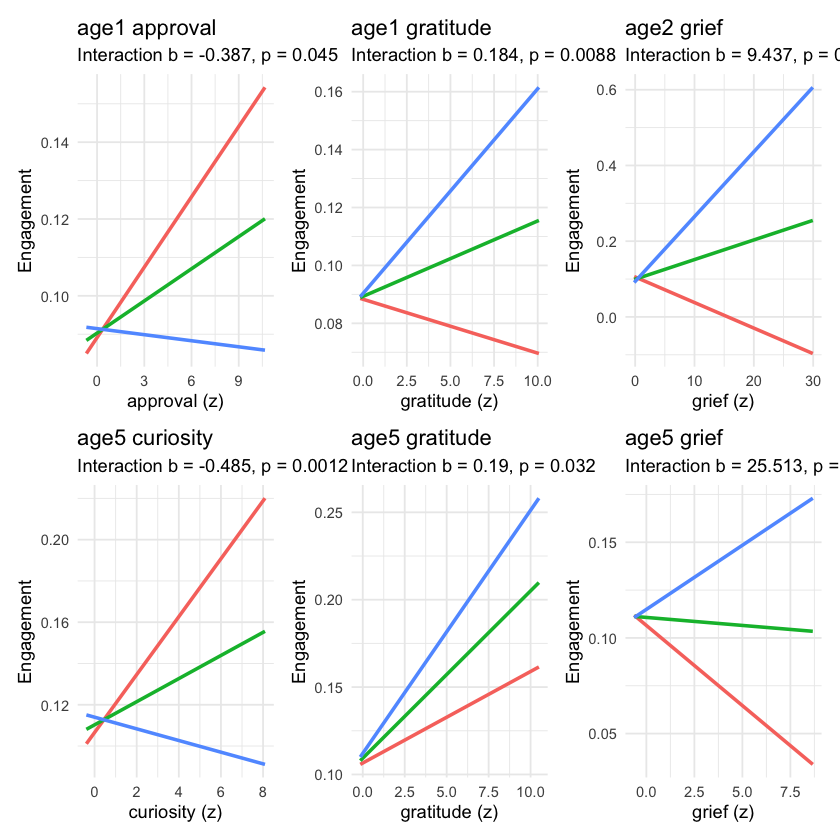

In [49]:
plots <- lapply(seq_len(nrow(mods)), function(i) {

  a <- mods$age_group[i]
  e <- mods$emotion[i]

  d <- finalD |>
    filter(age_group == a) |>
    mutate(
      emo_z = scale(.data[[e]])[,1],
      rel_z = scale(relatability_score)[,1]
    )

  rel_vals <- c(-1, 0, 1)  # low / mean / high

  newdat <- expand.grid(
    emo_z = seq(min(d$emo_z), max(d$emo_z), length.out = 100),
    rel_z = rel_vals
  )

  m <- lm(engagement ~ emo_z * rel_z, data = d)
  newdat$y <- predict(m, newdat)

  newdat$rel_label <- factor(
    newdat$rel_z,
    levels = rel_vals,
    labels = c("Low relatability", "Mean", "High relatability")
  )

  ggplot(newdat, aes(emo_z, y, color = rel_label)) +
    geom_line(linewidth = 1) +
    labs(
      title = paste(a, e),
      subtitle = paste0(
        "Interaction b = ", round(mods$b[i], 3),
        ", p = ", signif(mods$p[i], 2)
      ),
      x = paste(e, "(z)"),
      y = "Engagement",
      color = "Relatability"
    ) +
    theme_minimal() + theme(legend.position = "none")
})

wrap_plots(plots, ncol = 3)

#red low. green mean, blue high


`Section 4: Mediators`

In [ ]:
### Import relevant libraries

library(tidyverse)
library(mediation)
library(stats)
library(ggplot2)
library(patchwork)

In [3]:
### Import dataset

finalD <- read.csv("data/finalD.csv")
head(finalD)

,username,engagement,age_group,relatability_score,admiration,amusement,anger,annoyance,approval,caring,⋯,love,nervousness,optimism,pride,realization,relief,remorse,sadness,surprise,neutral
,<chr>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,anon_0001,0.16768293,age1,0.9556207,0.006488900,0.0027529043,0.0012637242,0.003769238,0.012369382,0.000699000,⋯,0.002648631,0.0002086844,0.005396174,0.0003147844,0.009153676,0.0002317454,0.0006686055,0.002342712,0.0042027230,0.6811876
2,anon_0002,0.03564356,age1,0.9812527,0.006649268,0.0016222633,0.0006103090,0.001963300,0.014374962,0.000633100,⋯,0.001728526,0.0002836434,0.001688091,0.0007238435,0.008073153,0.0004804298,0.0006036308,0.002882659,0.0038124397,0.9615418
3,anon_0003,0.02474903,age1,0.8786346,0.001476176,0.0008018169,0.0018695145,0.004185256,0.004588686,0.001858894,⋯,0.001890902,0.0003131516,0.001142472,0.0001890156,0.009771231,0.0003575520,0.0018295142,0.015345638,0.0069766180,0.4811077
4,anon_0004,0.07424423,age1,0.9673172,0.046669099,0.0005513479,0.0006657385,0.008452718,0.015583318,0.003499811,⋯,0.003766054,0.0003926797,0.002119249,0.0033684352,0.022147780,0.0082995854,0.0018916252,0.008402253,0.0005452649,0.1203209
5,anon_0005,0.06142098,age1,0.5260985,0.008951097,0.0095324172,0.0038265081,0.022287868,0.007277620,0.009099257,⋯,0.097501576,0.0007336757,0.002674093,0.0002433428,0.014961365,0.0013937610,0.0302667767,0.120188124,0.0029044182,0.3155946
6,anon_0006,0.14450867,age1,0.4303329,0.002439351,0.0010051597,0.0020727965,0.003213891,0.007901312,0.001682773,⋯,0.002105226,0.0004286097,0.001111082,0.0003168825,0.004147874,0.0019017129,0.0011888071,0.004738195,0.0019538696,0.9680445


In [7]:
### Mediation 

results <- list()

for (a in age_groups) for (e in emotionsL) {
  m_mod <- lm(as.formula(paste("relatability_score ~", e)), data = finalD[finalD$age_group == a, ]) # x predicts the mediator
  y_mod <- lm(as.formula(paste("engagement ~", e, "+ relatability_score")), data = finalD[finalD$age_group == a, ]) # x and m predict the outcome
  med <- mediate(m_mod, y_mod, treat = e, mediator = "relatability_score", boot = TRUE, sims = 1000)
  s <- summary(med)

  acme_sig <- s$d0.p < .05
  ade_sig  <- s$z0.p < .05
  prop_sig <- !is.na(s$n0.p) && s$n0.p < .05

  if (acme_sig) {
    type <- if (!ade_sig && !prop_sig) "primarily, small"
    else if (!ade_sig && prop_sig)     "primarily, large"
    else if (ade_sig && !prop_sig)      "partially, small"
    else                                "partially, large"

    results[[length(results) + 1]] <- data.frame(
      age_group = a,      emotion   = e,
      ACME      = s$d0,   p_ACME    = s$d0.p,
      ADE       = s$z0,   p_ADE     = s$z0.p,
      prop_med  = s$n0,   p_prop    = s$n0.p,
      type      = type
    )
  }
}

do.call(rbind, results)


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonparametric bootstrap


Running nonpar

age_group,emotion,ACME,p_ACME,ADE,p_ADE,prop_med,p_prop,type
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
age2,admiration,-0.009300801,0.000,0.018256034,0.354,-1.0385883,0.636,"primarily, small"
age2,annoyance,-0.025498240,0.010,-0.059425492,0.602,0.3002487,0.454,"primarily, small"
age2,approval,-0.044702058,0.008,-0.046166683,0.450,0.4919410,0.148,"primarily, small"
age2,caring,-0.040080520,0.000,-0.056030950,0.492,0.4170212,0.254,"primarily, small"
age2,disapproval,-0.025959529,0.018,-0.061873567,0.194,0.2955552,0.044,"primarily, large"
age2,relief,-0.282640063,0.030,-0.923126351,0.278,0.2344070,0.148,"primarily, small"
age2,neutral,0.004846390,0.002,-0.003218118,0.674,2.9763996,0.816,"primarily, small"


In [10]:
out <- list()

for (a in age_groups) for (e in emotionsL) {

  d <- finalD[finalD$age_group == a, ]

  # a-path: emotion → relatability
  m_a <- lm(as.formula(paste("relatability_score ~", e)), data = d)

  # b-path: relatability → engagement (controlling for emotion)
  m_b <- lm(as.formula(paste("engagement ~", e, "+ relatability_score")), data = d)

  a_coef <- summary(m_a)$coef[e, ]
  b_coef <- summary(m_b)$coef["relatability_score", ]

  ab <- a_coef["Estimate"] * b_coef["Estimate"]

  if (summary(m_a)$coef[e, "Pr(>|t|)"] < .05 &&
      summary(m_b)$coef["relatability_score", "Pr(>|t|)"] < .05) {

    out[[length(out) + 1]] <- data.frame(
      age_group = a,
      emotion   = e,
      a_path    = a_coef["Estimate"],
      p_a       = a_coef["Pr(>|t|)"],
      b_path    = b_coef["Estimate"],
      p_b       = b_coef["Pr(>|t|)"],
      ab        = ab
    )
  }
}

do.call(rbind, out)


,age_group,emotion,a_path,p_a,b_path,p_b,ab
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
Estimate,age2,admiration,0.3338205,2.525446e-06,-0.02786168,0.004240307,-0.009300801
Estimate1,age2,annoyance,0.9670307,2.892540e-02,-0.02636756,0.006336539,-0.025498240
Estimate2,age2,approval,1.7453385,2.125155e-10,-0.02561226,0.009178509,-0.044702058
Estimate3,age2,caring,1.5483380,3.383499e-06,-0.02588616,0.007862872,-0.040080520
Estimate4,age2,disapproval,0.9872573,1.560901e-02,-0.02629459,0.006509980,-0.025959529
Estimate5,age2,relief,10.8600742,6.230258e-03,-0.02602561,0.007114445,-0.282640063
Estimate6,age2,neutral,-0.1769915,2.099237e-10,-0.02738205,0.005362048,0.004846390



Mediation/Moderation Analysis 
Call: mediate(y = engagement ~ disapproval + (relatability_score), 
    data = finalD[finalD$age_group == "age2", ])

The DV (Y) was  engagement . The IV (X) was  disapproval . The mediating variable(s) =  relatability_score .

Total effect(c) of  disapproval  on  engagement  =  -0.09   S.E. =  0.12  t  =  -0.71  df=  998   with p =  0.48
Direct effect (c') of  disapproval  on  engagement  removing  relatability_score  =  -0.06   S.E. =  0.12  t  =  -0.5  df=  997   with p =  0.62
Indirect effect (ab) of  disapproval  on  engagement  through  relatability_score   =  -0.03 
Mean bootstrapped indirect effect =  -0.03  with standard error =  0.02  Lower CI =  -0.07    Upper CI =  0
R = 0.09 R2 = 0.01   F = 3.97 on 2 and 997 DF   p-value:  0.00796 

 To see the longer output, specify short = FALSE in the print statement or ask for the summary

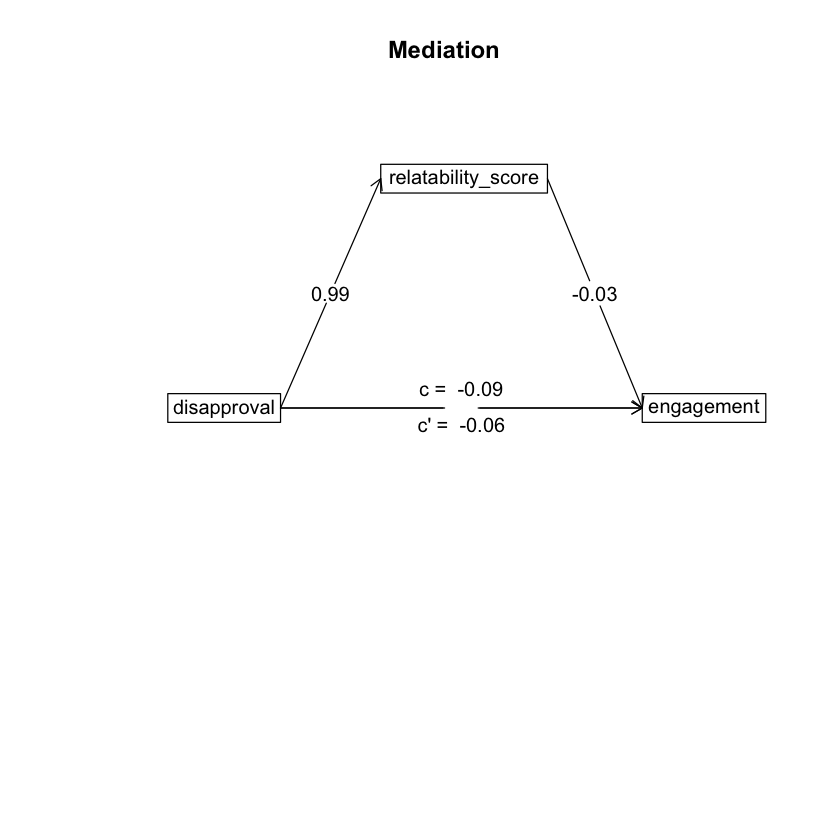

In [4]:
### Example of mediated relationship: disapproval

library(psych)

mediate(engagement ~ disapproval + (relatability_score), data=finalD[finalD$age_group=="age2", ])